<a href="https://colab.research.google.com/github/Angel353/Extracci-nDatos_CADII/blob/main/EjercicioSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
df = pd.read_csv('spotify-2023.csv',  encoding="ISO-8859-1")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# Estandarización Min-Max

df[['in_spotify_min_max', 'in_apple_min_max']] = (df[['in_spotify_playlists', 'in_apple_playlists']] - df[['in_spotify_playlists', 'in_apple_playlists']].min()) / (df[['in_spotify_playlists', 'in_apple_playlists']].max() - df[['in_spotify_playlists', 'in_apple_playlists']].min())

In [ ]:
df[['track_name','in_spotify_min_max', 'in_apple_min_max']]

,track_name,in_spotify_min_max,in_apple_min_max
0,Seven (feat. Latto) (Explicit Ver.),0.009874,0.063988
1,LALA,0.027295,0.071429
2,vampire,0.025838,0.139881
3,Cruel Summer,0.148051,0.172619
4,WHERE SHE GOES,0.058676,0.125000
...,...,...,...
947,My Mind & Me,0.017440,0.090774
948,Bigger Than The Whole Sky,0.021734,0.005952
949,A Veces (feat. Feid),0.010252,0.002976
950,En La De Ella,0.024382,0.043155


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Aplicar la estandarización
df[['in_spotify_playlists_Scaler']] = scaler.fit_transform(df[['in_spotify_playlists']])
df[['in_apple_playlists_Scaler']] = scaler.fit_transform(df[['in_apple_playlists']])
df[['track_name','in_spotify_min_max', 'in_spotify_playlists_Scaler', 'in_apple_min_max', 'in_apple_playlists_Scaler']]

,track_name,in_spotify_min_max,in_spotify_playlists_Scaler,in_apple_min_max,in_apple_playlists_Scaler
0,Seven (feat. Latto) (Explicit Ver.),0.009874,-0.588758,0.063988,-0.287724
1,LALA,0.027295,-0.472135,0.071429,-0.229871
2,vampire,0.025838,-0.481885,0.139881,0.302382
3,Cruel Summer,0.148051,0.336248,0.172619,0.556937
4,WHERE SHE GOES,0.058676,-0.262062,0.125000,0.186675
...,...,...,...,...,...
947,My Mind & Me,0.017440,-0.538107,0.090774,-0.079451
948,Bigger Than The Whole Sky,0.021734,-0.509363,0.005952,-0.738981
949,A Veces (feat. Feid),0.010252,-0.586225,0.002976,-0.762123
950,En La De Ella,0.024382,-0.491635,0.043155,-0.449714


<Axes: xlabel='released_year'>

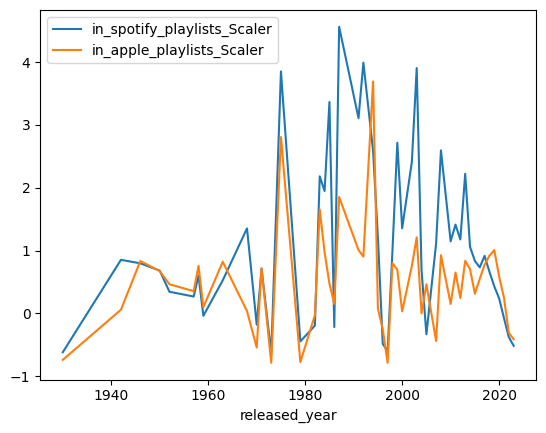

In [ ]:
df_group = df[['track_name','released_year','in_spotify_playlists_Scaler', 'in_apple_playlists_Scaler' ]]
# Agruparlos por el año
df_year = df_group.groupby('released_year')
# Encontrar la media para varias columnas
df_year[['in_spotify_playlists_Scaler', 'in_apple_playlists_Scaler']].mean().plot()

In [ ]:
df_group2 = df[['track_name','artist(s)_name','artist_count']]
df_artist = df_group2.groupby('artist(s)_name')
df_artist['artist(s)_name'].count()

,artist(s)_name
artist(s)_name,
(G)I-DLE,2
"21 Savage, Gunna",1
"24kgoldn, Iann Dior",1
50 Cent,1
"A$AP Rocky, Metro Boomin, Roisee",1
...,...
j-hope,1
"j-hope, J. Cole",1
sped up 8282,1


In [ ]:
%%shell
jupyter nbconvert --to html EjercicioSpotify.ipynb

[NbConvertApp] Converting notebook EjercicioSpotify.ipynb to html
[NbConvertApp] Writing 684544 bytes to EjercicioSpotify.html
